### Scenario 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("startup_funding.csv")



In [2]:
df["StartupName"].replace("Olacabs", "Ola", inplace = True)
df["StartupName"].replace("Ola Cabs", "Ola", inplace = True)
df["StartupName"].replace("Olacabs", "Ola", inplace = True)
df["StartupName"].replace("Oyorooms", "Oyo", inplace = True)
df["StartupName"].replace("Oyo Rooms", "Oyo", inplace = True)
df["StartupName"].replace("OYO Rooms", "Oyo", inplace = True)
df["StartupName"].replace("OyoRooms", "Oyo", inplace = True)
df["StartupName"].replace("OYOfit", "Oyo", inplace = True)
df["StartupName"].replace("Flipkart.com", "Flipkart", inplace = True)
df["StartupName"].replace("Paytm Marketplace", "Paytm", inplace = True)



In [3]:
df.dropna(subset=["InvestorsName"], how="all",inplace=True)
df.dropna(subset=["InvestmentType"], how="all",inplace=True)
df.dropna(subset=["StartupName"], how="all",inplace=True)

In [4]:
df = df[(df["InvestmentType"] == "Seed Funding") | (df["InvestmentType"] == "Crowd Funding")]



In [5]:
investors = np.array(df["InvestorsName"])
startup = np.array(df["StartupName"])

from collections import defaultdict
d = defaultdict(list)

for i in range(len(investors)):
    currStartup = startup[i]
    currInvestor = investors[i]
    name = currInvestor.split(',')
    for j in name:
        j = j.strip()
        if j == '' or j == ' ' or "Undisclosed" in j or "undisclosed" in j:
            continue
        d[j].append(currStartup)

In [6]:
d2 = {}
for i in d:
    a = np.array(d[i])
    d2[i] = len(np.unique(a))

ans = sorted(d2.items(), key = lambda x:x[1], reverse = True)[:5]

In [7]:
st = []
inv = []
for i in ans:
    print(i[0], i[1])
    st.append(i[1])
    inv.append(i[0])
    

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


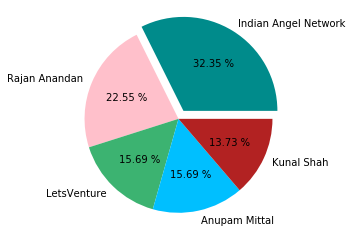

In [10]:
#VISUALIZATION

# x = np.arange(5)
# plt.bar(x, st, width = 0.5, color = "Orange")
# plt.grid()
# plt.xticks(x, inv, rotation = 40)
# plt.title("Top Investors")
# plt.xlabel("Name of Investor")
# plt.ylabel("Number of times Invested")
# plt.show()

# Pie chart
plt.pie(st, labels = inv, colors = ["darkcyan", "pink", "mediumseagreen", "deepskyblue", "firebrick"], explode = [0.1, 0,0,0,0], autopct = "%.2f %%")
plt.axis("equal")
plt.show()